In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
df.fillna(df['ph'].median(), inplace = True)
df.fillna(df['Sulfate'].median(), inplace = True)
df.fillna(df['Trihalomethanes'].median(), inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.006475,0.017466,0.040240,0.001444,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.031516,-0.023915,0.003610,-0.006379,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.027429,0.013831,0.010242,-0.022360,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.002636,-0.020486,-0.012653,0.015409,0.002363,0.023779
Sulfate,0.006475,-0.031516,-0.027429,0.002636,1.000000,-0.017994,0.029433,-0.012446,0.000192,0.011418
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.017994,1.000000,0.020966,0.015407,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.029433,0.020966,1.000000,-0.013614,-0.027308,-0.030001
Trihalomethanes,0.001444,-0.006379,-0.022360,0.015409,-0.012446,0.015407,-0.013614,1.000000,-0.019646,0.020354
Turbidity,-0.036107,-0.014449,0.019546,0.002363,0.000192,0.005798,-0.027308,-0.019646,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,0.011418,-0.008128,-0.030001,0.020354,0.001581,1.000000


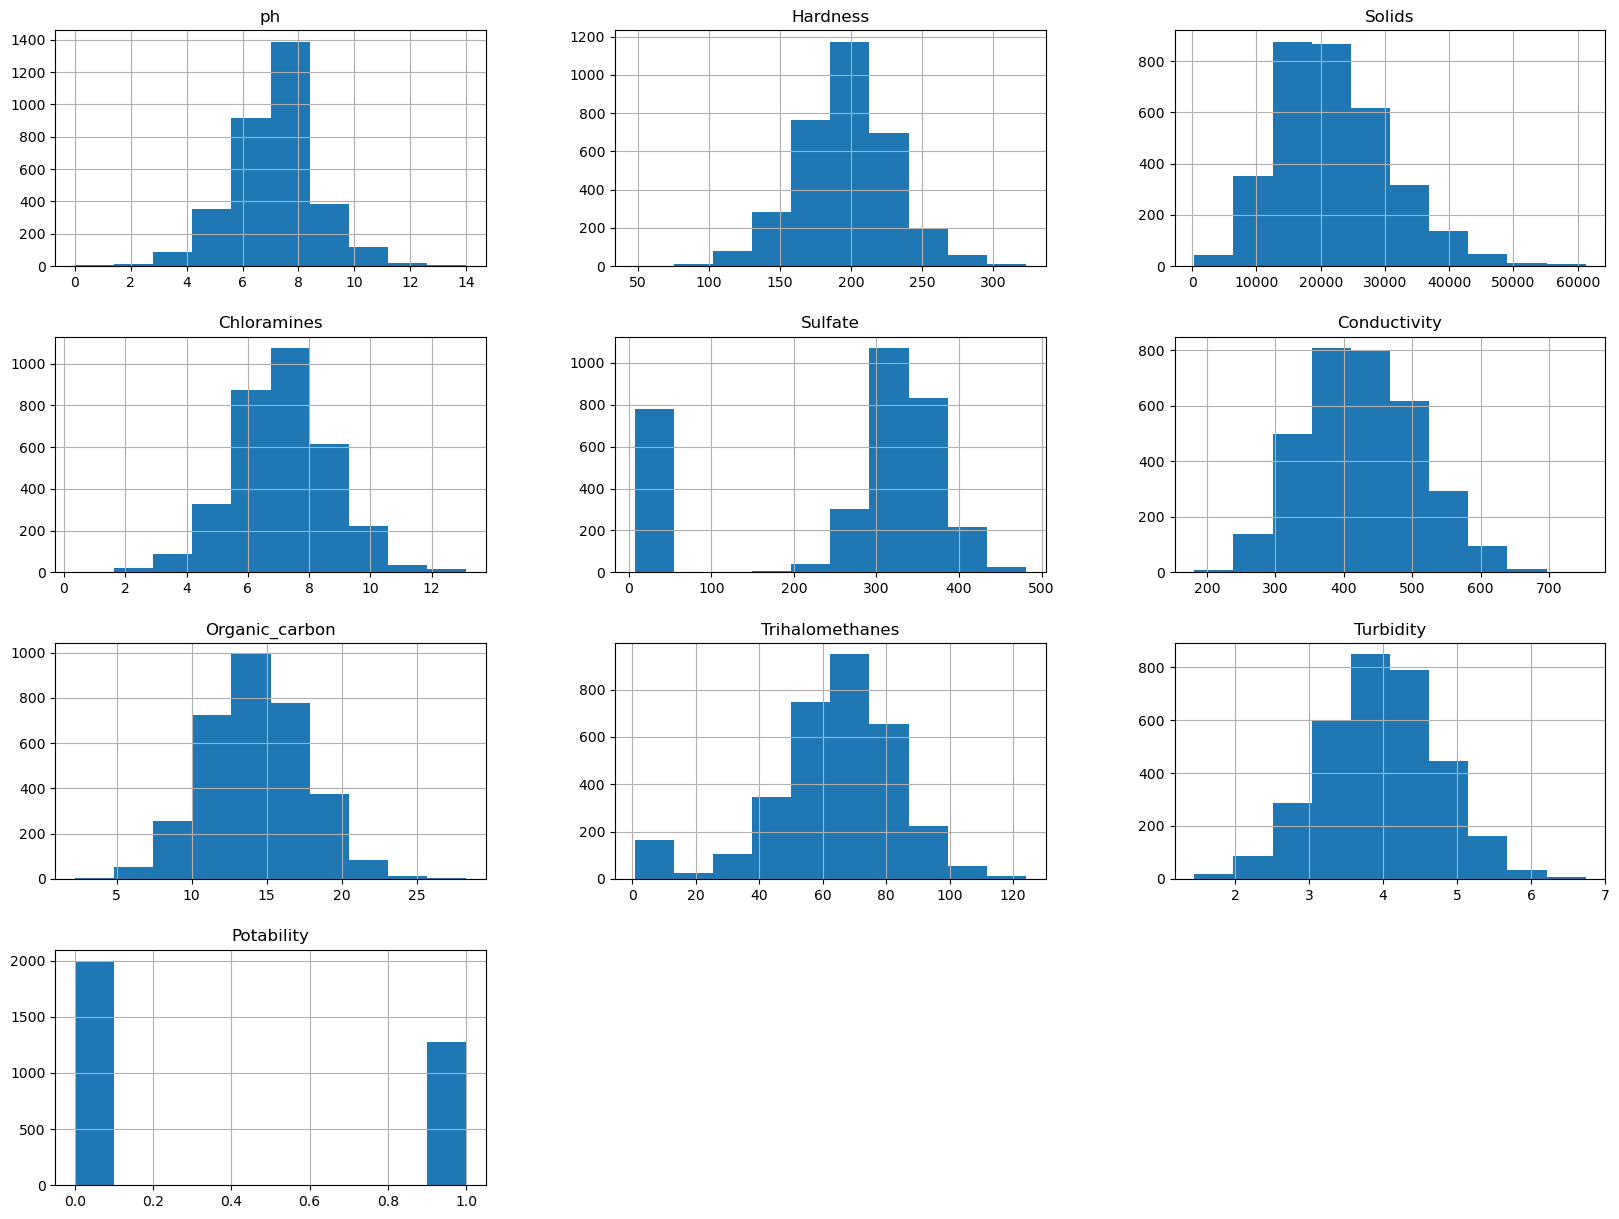

In [11]:
df.hist(figsize = (20, 15))
plt.show()

In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2620, 9)
(2620,)
(656, 9)
(656,)


In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[ 1.29605497,  0.27879028, -0.76238183, ...,  1.46367097,
         0.10956048, -2.74313223],
       [-0.1533341 , -0.36934865,  2.21670792, ..., -0.33681944,
         0.26800394, -0.71743387],
       [ 0.74694583, -2.09520712, -1.32009486, ..., -0.70630071,
         1.32689863, -1.3723098 ],
       ...,
       [-0.23153813, -0.38375126, -1.43623729, ..., -0.66903913,
        -0.33886798, -0.00828407],
       [ 0.67666861, -0.75044524,  0.73170151, ...,  0.57755002,
         1.3514532 , -0.25947996],
       [ 0.70472103,  0.13049597,  0.51968183, ..., -0.14580371,
        -1.4972584 ,  0.51876428]])

In [25]:
X_test

array([[ 0.68604273,  0.54783196,  0.59924172, ..., -0.55059912,
         0.09787231, -0.83204256],
       [-0.62710325, -1.11921062, -0.24058719, ...,  0.75149401,
        -1.04266364, -0.2123848 ],
       [-0.20360098, -0.06058096, -0.70214215, ...,  2.60123002,
         0.588771  , -0.93438871],
       ...,
       [ 1.35176656, -2.26714888, -0.71365494, ...,  0.22631234,
        -0.01293885,  1.2383729 ],
       [-0.6473491 ,  1.350551  , -1.48712632, ...,  0.76596665,
        -0.76653225,  1.27174459],
       [-0.09343153,  0.32993785,  0.27956865, ...,  0.66885897,
         0.56777162,  1.20058204]])

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [80]:
model_1 = Sequential([
    Dense(units = 9, activation = 'relu'),
    Dense(units = 30, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 30, activation = 'relu'),
    Dropout(0.1),
    Dense(units = 1, activation = 'sigmoid')
])

model_1.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [81]:
history_1 = model_1.fit(X_train, y_train,
                           epochs = 20,
                           batch_size = 32,
                           validation_split = 0.2)

Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5661 - loss: 0.6916 - val_accuracy: 0.6221 - val_loss: 0.6666
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6299 - loss: 0.6707 - val_accuracy: 0.6260 - val_loss: 0.6626
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6093 - loss: 0.6717 - val_accuracy: 0.6221 - val_loss: 0.6603
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5972 - loss: 0.6704 - val_accuracy: 0.6240 - val_loss: 0.6600
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6061 - loss: 0.6735 - val_accuracy: 0.6221 - val_loss: 0.6576
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6087 - loss: 0.6628 - val_accuracy: 0.6240 - val_loss: 0.6552
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6181 - loss: 0.6620 - val_accuracy: 0.6279 - val_loss: 0.6542
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6024 - loss: 0.6706 - val_accuracy: 0.6240 - val_loss:

In [54]:
from sklearn.svm import SVC

In [57]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8
0,1.296055,0.278790,-0.762382,-2.585128,0.194250,-0.251899,1.463671,0.109560,-2.743132
1,-0.153334,-0.369349,2.216708,-0.411646,-1.724928,-0.354106,-0.336819,0.268004,-0.717434
2,0.746946,-2.095207,-1.320095,-0.810268,0.081727,0.757491,-0.706301,1.326899,-1.372310
3,-0.056330,-1.905666,0.005186,0.924816,0.591992,1.355818,0.572661,1.379991,0.358838
4,1.220963,1.004491,-1.597521,2.143569,0.156540,-0.699994,0.456128,0.671314,0.785715
...,...,...,...,...,...,...,...,...,...
2615,0.584917,-0.455800,-0.692353,0.095148,-1.724928,-1.668439,-0.373920,0.669580,-0.237986
2616,-0.020871,1.703455,-1.120475,-1.721577,0.482271,-0.052987,-0.336250,-1.137366,-0.734104
2617,-0.231538,-0.383751,-1.436237,0.563522,0.618559,-1.311291,-0.669039,-0.338868,-0.008284
2618,0.676669,-0.750445,0.731702,-0.454476,0.437845,0.868796,0.577550,1.351453,-0.259480


In [58]:
base_model_1 = SVC()

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'C': [1, 2, 3, 4, 5]}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator =base_model_1,
                          param_grid = param_grid,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)

grid_search.fit(X_train, y_train)
print(f"Best accuracy: {100 * (grid_search.best_score_)}")
print(f"Best parameters: {grid_search.best_params_}")

Best accuracy: 64.35114503816794
Best parameters: {'C': 1, 'kernel': 'rbf'}


In [59]:
model_2 = SVC(C = 1, kernel = 'rbf')
model_2.fit(X_train, y_train)

SVC(C=1)

In [83]:
from sklearn.ensemble import RandomForestClassifier

base_model_2 = RandomForestClassifier()

param_grid_2 = {'n_estimators': [10, 50, 100, 150],
               'criterion' : ['gini', 'entropy', 'log_loss'],
               'min_samples_split': [1, 2, 3, 4, 5],
               'max_features' : ['sqrt', 'log2', None]}

grid_search_2 = GridSearchCV(estimator = base_model_2,
                            param_grid = param_grid_2,
                            scoring = 'accuracy',
                            cv = 10,
                            n_jobs = -1)

grid_search_2.fit(X_train, y_train)
print(f"Best accuracy: {100 * (grid_search_2.best_score_)}")
print(f"Best parameters: {grid_search_2.best_params_}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

Best accuracy: 66.64122137404578
Best parameters: {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 150}


In [87]:
model_3 = RandomForestClassifier(criterion = 'entropy', max_features = 'log2', min_samples_split = 3, n_estimators = 150)
model_3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=3, n_estimators=150)

In [88]:
pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(f"Model 1 accuracy : {100 * accuracy_score(y_test, tf.round(pred_1))}")
print(f"Model 2 accuracy : {100 * accuracy_score(y_test, pred_2)}")
print(f"Model 3 accuracy : {100 * accuracy_score(y_test, pred_3)}")

Model 1 accuracy : 62.5
Model 2 accuracy : 64.63414634146342
Model 3 accuracy : 67.53048780487805


In [92]:
import pickle

In [97]:
filename = "trained_model.sav"
pickle.dump(model_3, open(filename, 'wb'))

In [98]:
loaded_model = pickle.load(open("trained_model.sav", 'rb'))

In [99]:
y_pred = loaded_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,